source http://darques.eu/blog/index.php/2017/07/27/mlbox-a-short-regression_tutorial/

In [ ]:
# !pip install mlbox

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#Import MLBox and other packages
import mlbox as mlb #I don't really like * imports

In [ ]:
# Read files using preprocessing.reader
# Usage: train_test_split(path to training data,path to test data,target)
# Target is "SalePrice", i.e. the price the houses are sold
data = mlb.preprocessing.Reader(sep = ",").train_test_split(["train.csv","test.csv"], 'SalePrice')


reading csv : train.csv ...
cleaning data ...
CPU time: 4.677141904830933 seconds

reading csv : test.csv ...
cleaning data ...
CPU time: 0.35143613815307617 seconds

> Number of common features : 80

gathering and crunching for train and test datasets ...
reindexing for train and test datasets ...
dropping training duplicates ...
dropping constant variables on training set ...

> Number of categorical features: 43
> Number of numerical features: 37
> Number of training samples : 1460
> Number of test samples : 1459

> Top sparse features (% missing values on train set):
PoolQC         99.5
MiscFeature    96.3
Alley          93.8
Fence          80.8
FireplaceQu    47.3
dtype: float64

> Task : regression
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [ ]:
data

{'target': 0       208500.0
 1       181500.0
 2       223500.0
 3       140000.0
 4       250000.0
           ...   
 1455    175000.0
 1456    210000.0
 1457    266500.0
 1458    142125.0
 1459    147500.0
 Name: SalePrice, Length: 1460, dtype: float64,
 'test':       1stFlrSF  2ndFlrSF  3SsnPorch  ... YearBuilt  YearRemodAdd  YrSold
 0        896.0       0.0        0.0  ...    1961.0        1961.0  2010.0
 1       1329.0       0.0        0.0  ...    1958.0        1958.0  2010.0
 2        928.0     701.0        0.0  ...    1997.0        1998.0  2010.0
 3        926.0     678.0        0.0  ...    1998.0        1998.0  2010.0
 4       1280.0       0.0        0.0  ...    1992.0        1992.0  2010.0
 ...        ...       ...        ...  ...       ...           ...     ...
 1454     546.0     546.0        0.0  ...    1970.0        1970.0  2006.0
 1455     546.0     546.0        0.0  ...    1970.0        1970.0  2006.0
 1456    1224.0       0.0        0.0  ...    1960.0        1996.0  200

In [ ]:
# Preprocess data
# 1/ Remove Ids
# 2/ Delete drifting data between train and test sets
data = mlb.preprocessing.Drift_thresholder().fit_transform(data)


computing drifts ...
CPU time: 1.5159821510314941 seconds

> Top 10 drifts

('Id', 1.0)
('Neighborhood', 0.04722343977526999)
('Exterior1st', 0.045904017693388255)
('FireplaceQu', 0.045747015128804414)
('MoSold', 0.04341444476105982)
('BsmtFinSF1', 0.040133480366378205)
('FullBath', 0.03613018653787892)
('BsmtExposure', 0.027441685515571912)
('OpenPorchSF', 0.02711761305031546)
('Fireplaces', 0.026560063848172888)

> Deleted variables : ['Id']
> Drift coefficients dumped into directory : save


In [ ]:
# space_ligtgbm = {
#                 'ne__numerical_strategy'    :{"search":"choice",
#                                               "space":[0,'mean','median','most_frequent']},
#                 'ne__categorical_strategy'  :{"search":"choice",
#                                               "space":[np.NaN,"None"]},
#                 'ce__strategy'              :{"search":"choice",
#                                               "space":['label_encoding','entity_embedding','dummification']},
#                 'fs__strategy'              :{"search":"choice",
#                                               "space":['l1','variance','rf_feature_importance']},
#                 'fs__threshold'             :{"search":"uniform",
#                                               "space":[0.01,0.6]},
#                 'est__strategy'             :{"search":"choice",
#                                               "space":["LightGBM"]},
#                 'est__max_depth'            :{"search":"choice",
#                                               "space":[3,4,5,6,7]},
#                 'est__learning_rate'        :{"search":"uniform",
#                                               "space":[0.01,0.1]},
#                 'est__subsample'            :{"search":"uniform",
#                                               "space":[0.4,0.9]},
#                 'est__reg_alpha'            :{"search":"uniform",
#                                               "space":[0,10]},
#                 'est__reg_lambda'           :{"search":"uniform",
#                                               "space":[0,10]},
#                 'est__n_estimators'         :{"search":"choice",
#                                               "space":[1000,1250,1500]}
#                 }

In [ ]:
space_ligtgbm = {

                'est__strategy'             :{"search":"choice",
                                              "space":["LightGBM"]},
                'est__max_depth'            :{"search":"choice",
                                              "space":[3,4,5,6,7]},
                'est__learning_rate'        :{"search":"uniform",
                                              "space":[0.01,0.1]},
                'est__subsample'            :{"search":"uniform",
                                              "space":[0.4,0.9]},
                'est__reg_alpha'            :{"search":"uniform",
                                              "space":[0,10]},
                'est__reg_lambda'           :{"search":"uniform",
                                              "space":[0,10]},
                'est__n_estimators'         :{"search":"choice",
                                              "space":[1000,1250,1500]}
                }

In [20]:
# Optimisation
best_lightgbm = mlb.optimisation.Optimiser(scoring = "r2", n_folds = 10).optimise(space_ligtgbm, data, 120)

##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'learning_rate': 0.01771273977926663, 'max_depth': 7, 'n_estimators': 1500, 'reg_alpha': 6.130781698578815, 'reg_lambda': 7.6150355762414454, 'subsample': 0.5915113061518742, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'silent': True, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
  0%|          | 0/120 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:74: UserWarning: Optimiser will save all your fitted models into directory 'save/joblib'. Please clear it regularly.
  +str(self.to_path)+"/joblib'. Please clear it regularly.")


MEAN SCORE : r2 = 0.869697903366719
VARIANCE : 0.06742944921959018 (fold 1 = 0.9292017608702638, fold 2 = 0.8576146601868421, fold 3 = 0.9167478588731642, fold 4 = 0.8132731723427669, fold 5 = 0.864350869885966, fold 6 = 0.8960357998769246, fold 7 = 0.6982954545621015, fold 8 = 0.8784329808693444, fold 9 = 0.9010668522225097, fold 10 = 0.941959623977307)
CPU time: 19.97510027885437 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'learning_rate': 0.07905824236634586, 'max_depth': 7, 'n_estimators': 1000, 'reg_alpha': 0.15273693772457353, 'reg_lambda': 6.7605046868388055, 'subsample': 0.541816544699501, 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'min_child_samples': 20, 'm

In [21]:
best_lightgbm

{'est__learning_rate': 0.04885772765529518,
 'est__max_depth': 4,
 'est__n_estimators': 1500,
 'est__reg_alpha': 7.18548335406181,
 'est__reg_lambda': 2.838006668603348,
 'est__strategy': 'LightGBM',
 'est__subsample': 0.6849382767405983}


fitting the pipeline ...
CPU time: 1.5963757038116455 seconds


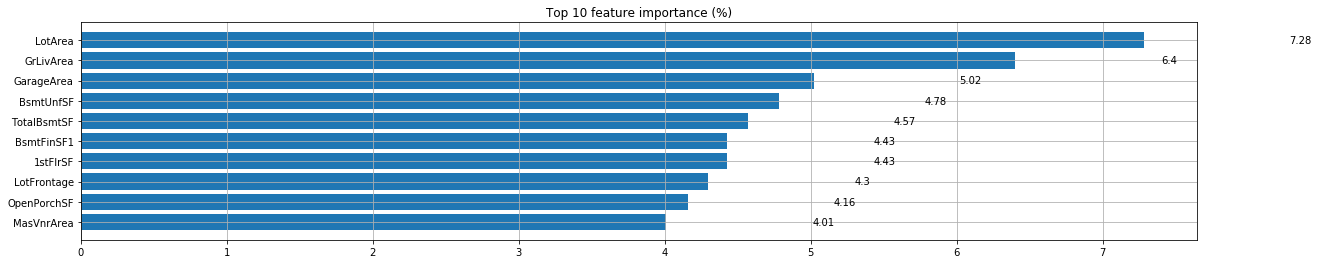


> Feature importances dumped into directory : save

predicting...
CPU time: 0.22804021835327148 seconds

> Overview on predictions : 

   SalePrice_predicted
0        128236.388919
1        165725.367767
2        190169.936663
3        199816.260483
4        186326.892343
5        172109.765579
6        179348.339499
7        168624.767424
8        173086.942237
9        124716.859474

dumping predictions into directory : save ...


In [22]:
# Predict on the test data using best parameters
mlb.prediction.Predictor().fit_predict(best_lightgbm, data)

In [23]:
# Train and evaluate with default parameters
# best is a set of parameters that were estimated as being the best
# default = mlb.optimisation.Optimiser().evaluate(None, data)